<a target="_blank" href="https://colab.research.google.com/github/olsenlabmit/Polymer-Ensemble-Similarity/blob/main/notebooks/Example1_Two_Component_Polymer_Ensemble_Colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# @title Copyright & License (click to expand)

# MIT License

# Copyright (c) 2023 olsenlabmit

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# Download Necessary Files

Downloading local python functions, tables, and dataset
from Github Repo [Polymer-Ensemble-Similarity](https://github.com/olsenlabmit/Polymer-Ensemble-Similarity.git)

In [ ]:
!git clone https://github.com/olsenlabmit/Polymer-Ensemble-Similarity.git
!mv Polymer-Ensemble-Similarity/dataset .
!mv Polymer-Ensemble-Similarity/tables .
!mv Polymer-Ensemble-Similarity/utils .

# Import Required Libraries

In [31]:
import random
import numpy as np
import shutil
import sys
import os.path
import json
from scipy.stats import norm
import matplotlib.pyplot as plt


if not shutil.which("rdkit"):
    !pip install -q rdkit

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

if not shutil.which("grakel"):
    !pip install grakel

if not shutil.which("dgl"):
    !pip install dgl

if not shutil.which("umap"):
    !pip install umap-learn

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert shutil.which("pyomo")

from pyomo.environ import *

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass

assert shutil.which("cbc") or os.path.isfile("cbc")

from utils.load_networkx import networkx_feat
from utils import macro_unsupervised as unsup
from utils import plot

print("Import Required Libraries Done!")

Import Required Libraries Done!


# Load the Ensemble P and Ensemble Q in Example 1

## Graph Representation Index Sort Function

P = \{"p1": graph representatioon of p1, "p2", graph representatioon of p2}.

Q = \{"q1": graph representatioon of q1, "q2", graph representatioon of q2}.

These graph representations are stored in dict format, which is a python dictionary. The dictionary does not have order. Therefore, we need to have some sort functions to call them in order according their labels (keys).


In [33]:
# "p1", "p2" (or "q1", "q2")
# These graph representation labels (keys) are one alphabet and one number.
# In one specific polymer ensemble,
# the alphabet is constant, and the number is varying.
# Therefore, we use the number for sort function.
# The sort function depends on how the graph labels are created.
def sortFunc(index):
    return int(index[1:])

## Load Ensemble P

<img src="https://drive.google.com/uc?export=view&id=1b0wnyachSnJKj1pSajL5GT0erMGUwx3p"  width="50%">

where blue sphere is R0, red sphere is R1.


$w_{p_{1}} = 0.5, w_ {p_{2}} = 0.5$

### Load Graph Representations in Ensemble P

**Variables**:

networkx_feat: the function for loading the graph representations of each type polymer chain in one polymer ensemble.

TXT_DATA_PATH: the path for ensemble dataset where each polymer chain graph representation is stored as a txt file.

MON_SMILES: the text file for repeat units

FEAT: Type of features for polymer chain repeat units -- one-hot encoding ('onehot') or fingerprints ('fp')

To understand how to generate the txt files for polymer chains, please check the dataset [README.md](https://github.com/olsenlabmit/Polymer-Ensemble-Similarity/blob/main/dataset/README.md).

In [5]:
Ensemble_P = networkx_feat(
    TXT_DATA_PATH="./dataset/Example1/Ensemble_P/",
    MON_SMILES="tables/SMILES_monomer.txt",
    FEAT="onehot",
)

Ensemble_P_indexs = list(Ensemble_P.keys())
Ensemble_P_indexs.sort(key=sortFunc)

### Load Weights of Graph Representations in Ensemble P

In [6]:
with open("./dataset/Example1/Ensemble_P_weight.json", "r") as json_file:
    Ensemble_P_weight = json.load(json_file)
print(Ensemble_P_weight)

{'p1': 0.5, 'p2': 0.5}


### Visualize Ensemble P

p1: 


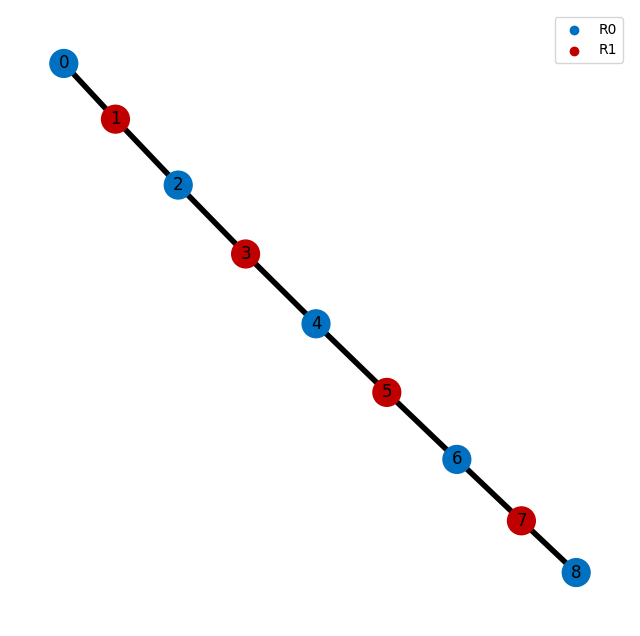

{0: 'R0', 1: 'R1', 2: 'R0', 3: 'R1', 4: 'R0', 5: 'R1', 6: 'R0', 7: 'R1', 8: 'R0'}




p2: 


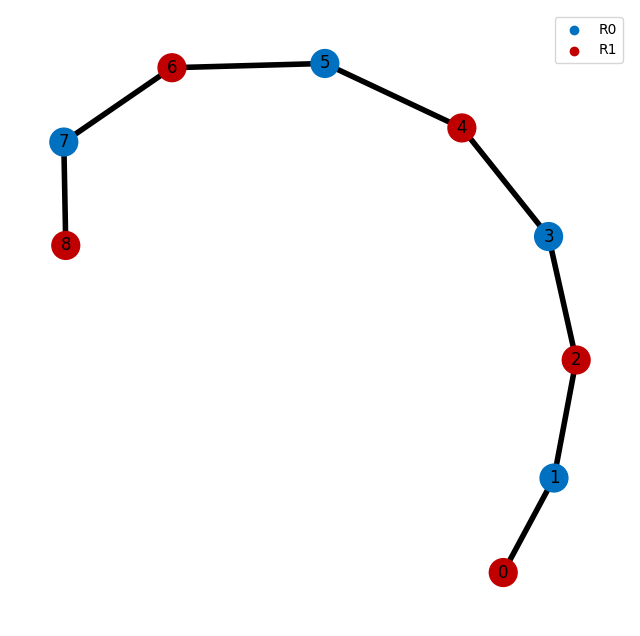

{0: 'R1', 1: 'R0', 2: 'R1', 3: 'R0', 4: 'R1', 5: 'R0', 6: 'R1', 7: 'R0', 8: 'R1'}






In [11]:
for i in range(0, len(Ensemble_P_indexs)):
    print(Ensemble_P_indexs[i] + ": ")
    plot.graph(Ensemble_P[Ensemble_P_indexs[i]])
    print("\n")
    print("\n")

## Load Ensemble Q

<img src="https://drive.google.com/uc?export=view&id=1N3J7IsU4bSUDWdDFi4LuBqETT0pMj8WD"  width="50%">

where blue sphere is R0, red sphere is R1.

$w_{q_{1}} = 0.5, w_ {q_{2}} = 0.5$

### Load Graph Representations in Ensemble Q

**Variables**:

networkx_feat: the function for loading the graph representations of each type polymer chain in one polymer ensemble.

TXT_DATA_PATH: the path for ensemble dataset

MON_SMILES: the text file for repeat units

FEAT: Type of fatures for polymer chain repeat units -- one-hot encoding ('onehot') or fingerprints ('fp')

In [12]:
Ensemble_Q = networkx_feat(
    TXT_DATA_PATH="./dataset/Example1/Ensemble_Q/",
    MON_SMILES="tables/SMILES_repeatunit.txt",
    FEAT="onehot",
)

Ensemble_Q_indexs = list(Ensemble_Q.keys())
Ensemble_Q_indexs.sort(key=sortFunc)

### Load Weights of Graph Representations in Ensemble Q

In [13]:
with open("./dataset/Example1/Ensemble_Q_weight.json", "r") as json_file:
    Ensemble_Q_weight = json.load(json_file)
print(Ensemble_Q_weight)

{'q1': 0.5, 'q2': 0.5}


### Visualize Ensemble Q

q1: 


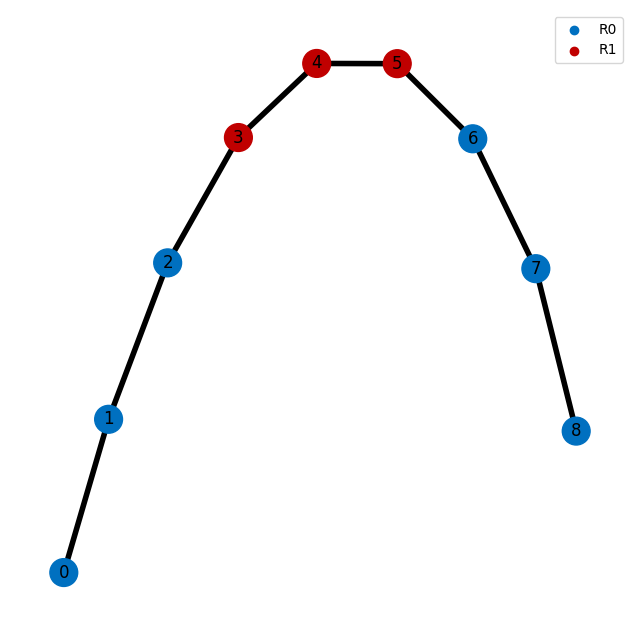

{0: 'R0', 1: 'R0', 2: 'R0', 3: 'R1', 4: 'R1', 5: 'R1', 6: 'R0', 7: 'R0', 8: 'R0'}


q2: 


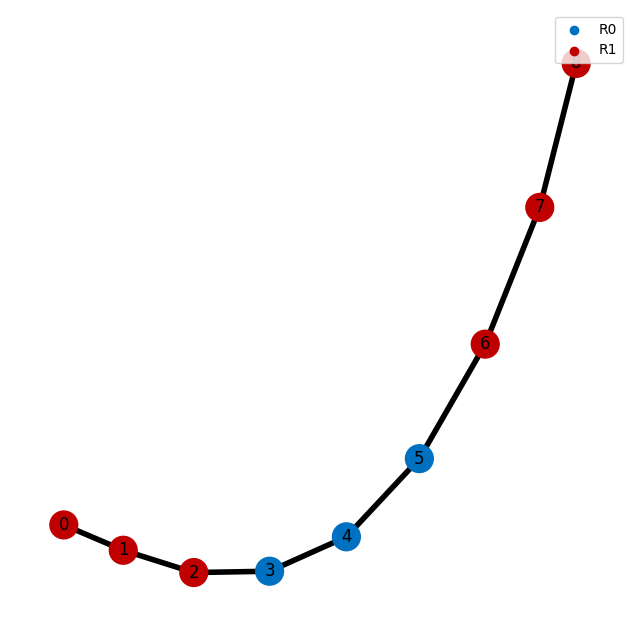

{0: 'R1', 1: 'R1', 2: 'R1', 3: 'R0', 4: 'R0', 5: 'R0', 6: 'R1', 7: 'R1', 8: 'R1'}




In [28]:
for i in range(0, len(Ensemble_Q_indexs)):
    print(Ensemble_Q_indexs[i] + ": ")
    plot.graph(Ensemble_Q[Ensemble_Q_indexs[i]])
    print("\n")

# Polymer Ensembles Similarity Function via Earth Mover's Distance

Use the earth mover's distance (EMD) to compute pairwise similarity scores between polymer ensembles.


$ EMD (P,Q)= \min_{F}\sum_{i=1}^{m}\sum_{j=1}^{n}f_{i,j}d_{i,j}$

$ {\rm subject\ to\ } f_{i,j} \geq 0, {\rm\ for\ any\ } \ 1 \leq i \leq m, 1 \leq j \leq n $

$     \sum_{j=1}^{n}f_{i,j} =w_{pi}, {\rm for\ any} \ 1 \leq i \leq m $

$     \sum_{i=1}^{m}f_{i,j} =w_{qj}, {\rm for\ any} \ 1 \leq j \leq n $

$     \sum_{i=1}^{m}\sum_{j=1}^{n}f_{i,j} = \sum_{i}^{m} w_{pi} = \sum_{j}^{n} w_{qj} = 1 $


One polymer ensemble is defined as $P = \{(p_1,w_{p_1}) ,(p_2,w_{p_2}),...,(p_i,w_{p_i}),...,(p_m,w_{p_m})\}$ has $m$ types of polymer chains, where $p_i$ represents a type of polymer chain and  $w_{p_i}>0$ is its corresponding weight, which can be the mole fraction of this polymer chain in the polymer ensemble. Similarly, the second ensemble $Q = {(q_1,w_{q_1}),(q_2,w_{q_2}),...,(q_j,w_{q_j}),...,(q_n,w_{q_n})}$ has $n$ types of polymer chains. The sums of the weights for $P$ and $Q$ are both normalized and equal to one.

The EMD linear optimization code  refers to [Transportation Networks, ND Pyomo Notebook](https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/03.01-Transportation-Networks.html)

Once $EMD (P,Q)$ is calculated, the similarity score between $P$ and $Q$ is

$S(P,Q) = 1- EMD (P,Q)$


The distance ($d_{i,j}$) between one polymer molecule $p_i$ and another polymer molecule $q_j$ is calculated through graph edit distance. This part of the code builds on [GLAMOUR](https://github.com/learningmatter-mit/GLAMOUR) and networkx function [graph_edit_distance](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.similarity.graph_edit_distance.html).

$d(g_1, g_2) = 1- \exp(-\frac{\alpha \cdot GED(g_1, g_2)}{(N_1 + N_2)/2})$

where $g_i$ is the graph representation of one polymer molecule, $N_i$ is the number of nodes in graph $g_i$, $\alpha$ is a tunable parameter with the default value being 1. [Reference1](https://arxiv.org/abs/1808.05689), [Reference2](https://doi.org/10.1021/acs.macromol.3c00761)

In [29]:
def Similarity_Score_EMD_Calculation(
    ensembleP=None,
    ensembleP_weight=None,
    ensembleQ=None,
    ensembleQ_weight=None,
    alpha=1,
    print_details=False,
):
    
    """
    Pairwise Similarity calculation between two polymer ensembles using EMD

    Parameters
    ----------
    ensembleP: dict-like of shape (m graphs), Ensemble P
    ensembleP_weight: dict-like of shape (m weights), Ensemble P weight
    ensembleQ: dict-like of shape (n graphs), Ensemble Q
    ensembleQ_weight: dict-like of shape (n graphs), Ensemble Q weight
    alpha: float, a tuning parameter for d_{i,j} calculation, default is 1
    print_details: bool, print the details of EMD calculation, default is False

    Returns
    -------
    float, pairwise similarity score between two polymer ensembles, range from 0 to 1.
    0 means two polymer ensembles are totally different.
    1 means two polymer ensembles are identical.
    The larger the similarity score, the more similar between two polymer ensembles.
    
    """


    # Data loading w_i, w_j, d_ij

    ## load the weight w_i of Ensemble P
    Demand = {}

    ensembleP_number = len(ensembleP_weight)

    ensembleP_weight_sum = sum(ensembleP_weight.values())

    ensembleP_indexs = list(ensembleP.keys())
    ensembleP_indexs.sort(key=sortFunc)

    for i in range(0, ensembleP_number):
        Demand["p" + str(i + 1)] = (
            ensembleP_weight[ensembleP_indexs[i]] / ensembleP_weight_sum
        )

    ## load the weight w_j of Ensemble Q
    Supply = {}

    ensembleQ_number = len(ensembleQ_weight)

    ensembleQ_weight_sum = sum(ensembleQ_weight.values())

    ensembleQ_indexs = list(ensembleQ.keys())
    ensembleQ_indexs.sort(key=sortFunc)

    for j in range(0, ensembleQ_number):
        Supply["q" + str(j + 1)] = (
            ensembleQ_weight[ensembleQ_indexs[j]] / ensembleQ_weight_sum
        )

    ## load the distance matrix D = [d_ij]
    D = {}
    for i in range(0, ensembleP_number):
        for j in range(0, ensembleQ_number):
            ### calculate the GED between two graph representations
            GED = unsup.edit_distance(
                ensembleP[ensembleP_indexs[i]],
                ensembleQ[ensembleQ_indexs[j]],
                node_attr="h",
                indel_mul=1,
                sub_mul=1,
            )

            ### calculate the number of nodes in graph N_i
            N_i = ensembleP[ensembleP_indexs[i]].number_of_nodes()

            ### calculate the number of nodes in graph N_j
            N_j = ensembleQ[ensembleQ_indexs[j]].number_of_nodes()

            D[("p" + str(i + 1), "q" + str(j + 1))] = 1 - np.exp(
                -alpha * GED / (0.5 * (N_i + N_j))
            )

    # The following are optimization steps
    ## Step 0: Create an instance of the model
    model = ConcreteModel()
    model.dual = Suffix(direction=Suffix.IMPORT)

    ## Step 1: Define index sets
    CUS = list(Demand.keys())
    SRC = list(Supply.keys())

    ## Step 2: Define the decision
    model.x = Var(CUS, SRC, domain=NonNegativeReals)

    ## Step 3: Define the objective
    model.Cost = Objective(
        expr=sum([D[c, s] * model.x[c, s] for c in CUS for s in SRC]), sense=minimize
    )

    ## Step 4: Add constraints
    model.src = ConstraintList()
    for s in SRC:
        model.src.add(sum([model.x[c, s] for c in CUS]) <= Supply[s])

    model.dmd = ConstraintList()
    for c in CUS:
        model.dmd.add(sum([model.x[c, s] for s in SRC]) == Demand[c])

    ## Step 5: Call the cbc solver to solve this EMD problem
    results = SolverFactory("cbc").solve(model)

    ## Step 6: Return EMD result
    if "ok" == str(results.Solver.status):
        if print_details == True:
            for s in SRC:
                for c in CUS:
                    if model.x[c, s]() > 0:
                        print(
                            "Ship from ",
                            s,
                            " to ",
                            c,
                            ":",
                            model.x[c, s](),
                            "*",
                            D[c, s],
                        )
        return 1 - model.Cost()

    else:
        print("No Valid Solution Found")
        return False

# Calculation of $S(P,Q)$

In [30]:
Similarity_Score = Similarity_Score_EMD_Calculation(
    ensembleP=Ensemble_P,
    ensembleP_weight=Ensemble_P_weight,
    ensembleQ=Ensemble_Q,
    ensembleQ_weight=Ensemble_Q_weight,
    alpha=1,
    print_details=False,
)

In [26]:
print("Similarity Score between P and Q = %.2f" % Similarity_Score)

Similarity Score between P and Q = 0.72
